## Checking what's left to scrape
    Working with media data


In [33]:
import pandas as pd
from newspaper import Article
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [2]:
data = pd.read_csv('news_scrape_with_forbes.csv')

In [3]:
data

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,Error
0,1838925040,https://news.mongabay.com/2021/02/eye-in-the-s...,An interdisciplinary team of zoologists and co...,Environmental science and conservation news,['Terna Gyuse'],2021-02-01 08:11:18+00:00,Eye in the Sky: Tech makes satellite imagery i...,"{'Wildlife', 'Animals', 'Jim Tan', 'Endangered...",[''],Satellite surveying still offers many advantag...,NaN
1,1839017422,https://www.cnbc.com/2021/02/01/amazon-alphabe...,"Ali Ghodsi, co-founder and CEO of Databricks I...","Amazon is getting involved in the start-up, Da...",['Jordan Novet'],2021-02-01 00:00:00,"Amazon, Alphabet and Salesforce are all invest...",set(),"['Start-up', 'Venture capital', 'Microsoft Cor...","Ali Ghodsi, co-founder and CEO of Databricks I...",NaN
2,1839009079,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,One of the hottest names in the investing worl...,One of the hottest names in the investing worl...,['Chris Katje'],NaN,15 Big Ideas In 'Disruptive Innovation' Accord...,"{'Government', 'Digital Wallets', 'Healthcare'...",[''],One of the hottest names in the investing worl...,NaN
3,1838767296,https://eurweb.com/2021/01/31/black-creators-a...,*It’s day four at the 2021 Sundance Film Festi...,NaN,['Olivia T.'],2021-01-31 00:00:00,Black Creators At Sundance 2021,"{'white wedding', 'sundance', 'Sophia Nahli Al...",[''],*It’s day four at the 2021 Sundance Film Festi...,NaN
4,1839090241,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,Loading... Loading...\n\nBill.com BILL shares ...,Bill.com (NYSE: BILL) shares are trading highe...,['Tanzeel Akhtar'],NaN,Why Bill.com's Stock Is Trading Higher Today -...,"{'Government', 'Healthcare', 'Politics', 'Regu...",[''],Loading... Loading...Bill.com BILL shares are ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80490,2814644498,https://www.forbes.com/sites/forbescommunicati...,"\nIn today’s fast-paced, social-media fueled ...",NaN,NaN,NaN,12 Smart Ways To Monitor And Manage A Company’...,NaN,NaN,NaN,NaN
80491,2814742635,https://www.forbes.com/sites/antoniopequenoiv/...,AMD’s stock surged more than 8% Wednesday foll...,NaN,NaN,NaN,AMD Shares Jump Over 8% After Optimistic AI Ch...,NaN,NaN,NaN,NaN
80492,2814765263,https://www.forbes.com/sites/miltonezrati/2023...,A rare sighting in today's China. (Photo By: M...,NaN,NaN,NaN,China’s Demographic Catastrophe,NaN,NaN,NaN,NaN
80493,2814851102,https://www.forbes.com/sites/alexknapp/2023/11...,InnovationRx is your weekly digest of healthca...,NaN,NaN,NaN,InnovationRx: The VA’s Call For AI Tools,NaN,NaN,NaN,NaN


In [4]:
%pwd

'/Users/trinidad/Desktop/Thesis/MA-Thesis/Media Cloud/scripts'

In [5]:
news1 = pd.read_csv('/Users/trinidad/Desktop/Thesis/MA-Thesis/Media Cloud/Data/scraped_news.csv')

In [7]:
news1[news1['Body'].isna()]

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,Error
8,1839132269,https://www.ibtimes.com/sex-zoom-hookups-ai-fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
9,1839039085,https://www.ibtimes.com/ford-put-google-cloud-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
13,1838735606,https://www.forbes.com/sites/eliamdur/2021/02/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
14,1839104848,http://feeds.baltimoresun.com/~r/baltimoresun/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 404 Client Er...
20,1839193535,https://www.forbes.com/sites/stevebanker/2021/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
...,...,...,...,...,...,...,...,...,...,...,...
192958,2814875288,https://www.wsj.com/articles/ai-wont-stop-peop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
192959,2814884038,https://www.wsj.com/articles/ai-wont-stop-peop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
192965,2814904118,https://www.forbes.com/sites/scottkramer/2023/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with 403 Client Er...
192966,2814904142,https://www.seattletimes.com/opinion/ais-chall...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article `download()` failed with HTTPSConnecti...


In [9]:
total = len(news1)
na_total = len(news1[news1['Body'].isna()])
total-na_total

116881

In [10]:
urls_all = pd.read_pickle('/Users/trinidad/Desktop/Thesis/MA-Thesis/Media Cloud/Data/media_urls.pkl')

In [12]:
##Select NaN rows to work with
nan_body_rows = news1[news1['Body'].isna()]
rows_work = nan_body_rows.drop_duplicates(subset='URL')

# Merge the two DataFrames based on the common column
nan_rows = pd.merge(nan_body_rows, urls_all, left_on='ID', right_on='stories_id', how='inner')

# Display the result
# Drop rows where 'media_name' is equal to 'Forbes'
nan_rows = nan_rows.loc[nan_rows['media_name'] != 'Forbes']

# Reset the index of the resulting DataFrame
nan_rows.reset_index(drop=True, inplace=True)

# Display the final result
nan_rows

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,...,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,2785435193,https://biztoc.com/x/8d4c8ec9efa76c3a?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131380973,2023-10-01 01:04:14,2785435193,[],AIO might be the new SEO,https://biztoc.com/x/8d4c8ec9efa76c3a?ref=ff,NaN
1,2785528434,https://biztoc.com/x/b677eccb162b6183?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131467582,2023-10-01 04:10:10,2785528434,[],Canada's voluntary AI code of conduct is coming,https://biztoc.com/x/b677eccb162b6183?ref=ff,NaN
2,2785528434,https://biztoc.com/x/b677eccb162b6183?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131467582,2023-10-01 04:10:10,2785528434,[],Canada's voluntary AI code of conduct is coming,https://biztoc.com/x/b677eccb162b6183?ref=ff,NaN
3,2785528725,https://biztoc.com/x/408fdd6563b06081?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131467874,2023-10-01 04:02:14,2785528725,[],‘First’ A.I.-Based High-Yield Quant Hedge Fund...,https://biztoc.com/x/408fdd6563b06081?ref=ff,NaN
4,2785528725,https://biztoc.com/x/408fdd6563b06081?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131467874,2023-10-01 04:02:14,2785528725,[],‘First’ A.I.-Based High-Yield Quant Hedge Fund...,https://biztoc.com/x/408fdd6563b06081?ref=ff,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2812850960,https://biztoc.com/x/85b4961e1a853ad4?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3155871664,2023-10-30 19:42:06,2812850960,[],"AI 'Must be Governed,' Biden Says While Announ...",https://biztoc.com/x/85b4961e1a853ad4?ref=ff,NaN
1821,2812851411,https://biztoc.com/x/1d4d8ffa24589087?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3155871981,2023-10-30 19:26:06,2812851411,[],Existential risk? Regulatory capture? AI for o...,https://biztoc.com/x/1d4d8ffa24589087?ref=ff,NaN
1822,2812852477,https://biztoc.com/x/c87e0fb940742caf?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3155872730,2023-10-30 19:10:07,2812852477,[],Biden signs order establishing standards to ma...,https://biztoc.com/x/c87e0fb940742caf?ref=ff,NaN
1823,2813304841,https://biztoc.com/x/ec4fcc8ec963e82f?ref=ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3156286855,2023-10-31 07:20:07,2813304841,[],What does the Biden’s executive order mean for...,https://biztoc.com/x/ec4fcc8ec963e82f?ref=ff,NaN


In [27]:
nan_rows.url

0       https://biztoc.com/x/8d4c8ec9efa76c3a?ref=ff
1       https://biztoc.com/x/b677eccb162b6183?ref=ff
2       https://biztoc.com/x/b677eccb162b6183?ref=ff
3       https://biztoc.com/x/408fdd6563b06081?ref=ff
4       https://biztoc.com/x/408fdd6563b06081?ref=ff
                            ...                     
1820    https://biztoc.com/x/85b4961e1a853ad4?ref=ff
1821    https://biztoc.com/x/1d4d8ffa24589087?ref=ff
1822    https://biztoc.com/x/c87e0fb940742caf?ref=ff
1823    https://biztoc.com/x/ec4fcc8ec963e82f?ref=ff
1824    https://biztoc.com/x/e5a84a41d3d68383?ref=ff
Name: url, Length: 1825, dtype: object

In [28]:
sampled_rows = nan_rows.sample(n=10, random_state=20)

ids_sample = sampled_rows['stories_id'].tolist()
urls_sample = sampled_rows['url'].tolist()

In [29]:
urls_sample

['https://biztoc.com/x/41d68bc24c005b29?ref=ff',
 'https://www.investors.com/news/technology/is-amazon-stock-buy-now-amzn/',
 'https://www.seattletimes.com/entertainment/for-author-haruki-murakami-reading-fiction-helps-us-see-through-lies-in-a-world-divided-by-walls/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all',
 'https://biztoc.com/x/301ca718eb77e121?ref=ff',
 'https://www.investors.com/news/technology/mbly-stock-mobileye-cruises-past-q3-targets/',
 'https://biztoc.com/x/3ef5e9a99bdbf6c9?ref=ff',
 'https://biztoc.com/x/c31d9346151453fb?ref=ff',
 'https://biztoc.com/x/c2b726e7e7cff3d1?ref=ff',
 'https://biztoc.com/x/2c5e0d6bcf281c55?ref=ff',
 'https://biztoc.com/x/99c96c5410573ce1?ref=ff']

In [ ]:
response = requests.get('https://www.seattletimes.com/entertainment/for-author-haruki-murakami-reading-fiction-helps-us-see-through-lies-in-a-world-divided-by-walls/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all')

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
title = (soup.find('title')).get_text()
body = soup.find_all('p')

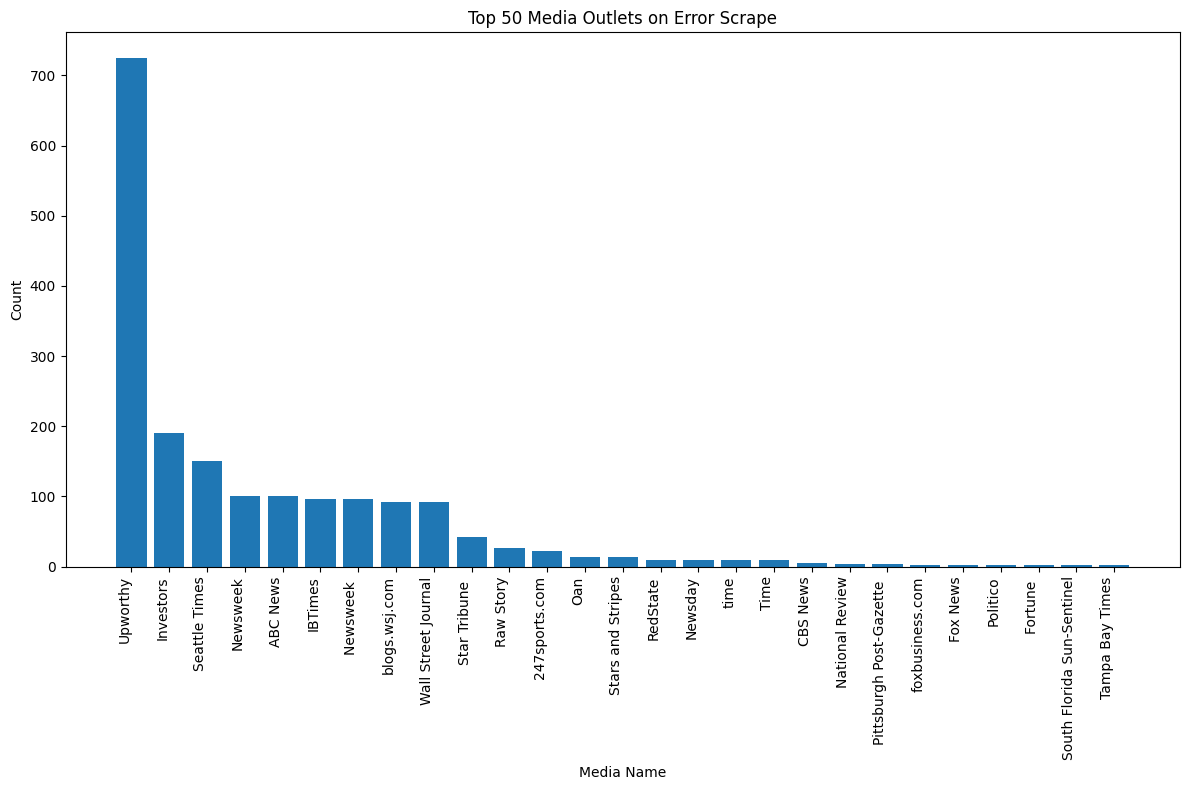

In [22]:
# Get the counts of unique values in the 'media_name' column
value_counts = nan_rows['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Media Outlets on Error Scrape')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [23]:
value_counts

media_name
Upworthy                      725
Investors                     191
Seattle Times                 150
Newsweek                      100
ABC News                      100
IBTimes                        96
Newsweek                       96
blogs.wsj.com                  92
Wall Street Journal            92
Star Tribune                   42
Raw Story                      27
247sports.com                  22
Oan                            14
Stars and Stripes              13
RedState                       10
Newsday                        10
time                           10
Time                           10
CBS News                        5
National Review                 4
Pittsburgh Post-Gazette         4
foxbusiness.com                 2
Fox News                        2
Politico                        2
Fortune                         2
South Florida Sun-Sentinel      2
Tampa Bay Times                 2
Name: count, dtype: int64